In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [4]:
iris = load_iris()
X = iris.data  
y = iris.target  
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
X.shape

(150, 4)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [38]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained: {sum(explained_variance):.2f}")

Explained Variance Ratio: [0.72962445 0.22850762 0.03668922]
Total Variance Explained: 0.99


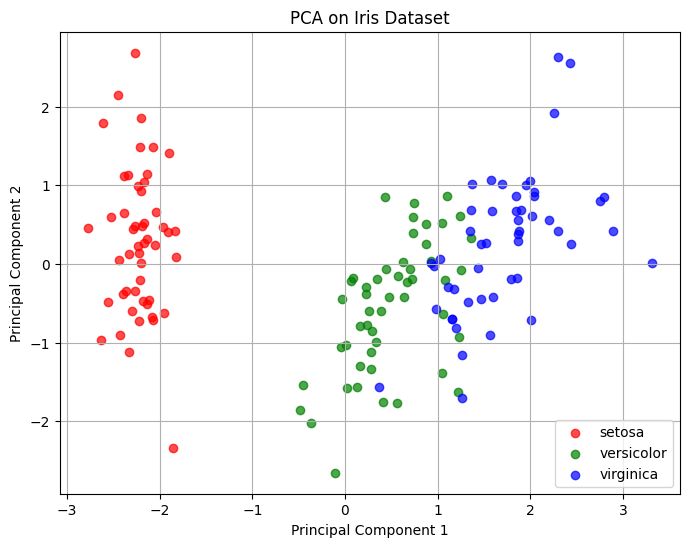

In [40]:
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], 
                color=color, label=label, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.grid()
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [48]:
y_pred = classifier.predict(X_test)
y_pred 

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression after PCA: {accuracy:.2f}")

Accuracy of Logistic Regression after PCA: 0.93
